NAME - SWASTIK ROY CHOUDHURY

Email Id- roychoudhuryswastik@gmail.com

## **Week 1 Task**

**Create Environment**

In [ ]:
# Mount Google Drive and Install Dependencies
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q pytesseract
!pip install -q pillow
!pip install -q opencv-python
!pip install -q pandas
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q scikit-learn
!pip install -q tqdm
!pip install -q google-cloud-vision
!pip install -q transformers
!pip install -q torch torchvision

print("✓ Google Drive mounted successfully!")
print("✓ All dependencies installed!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.9/527.9 kB 10.2 MB/s eta 0:00:00
✓ Google Drive mounted successfully!
✓ All dependencies installed!


In [ ]:
import os
import json
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# For preprocessing
from pathlib import Path
import shutil

# For visualization
from collections import Counter
import random

print("✓ All libraries imported successfully!")


✓ All libraries imported successfully!


**Define Dataset Path and Verify Structure**

In [ ]:
# Define your dataset path
BASE_PATH = "/content/drive/MyDrive/passionproject/resources/RVL_CDIP"

# Document categories in RVL-CDIP dataset
CATEGORIES = [
    'advertisement', 'budget', 'email', 'file_folder',
    'form', 'handwritten', 'invoice', 'letter',
    'memo', 'news_article', 'presentation', 'questionnaire',
    'resume', 'scientific_publication', 'scientific_report', 'specification'
]

# Verify the dataset structure
def verify_dataset_structure(base_path, categories):
    """Verify that all category folders exist and contain files"""
    print(f"Verifying dataset at: {base_path}\n")

    if not os.path.exists(base_path):
        print(f"❌ ERROR: Base path does not exist: {base_path}")
        return False

    results = {}
    total_files = 0

    for category in categories:
        category_path = os.path.join(base_path, category)
        if os.path.exists(category_path):
            files = [f for f in os.listdir(category_path) if f.endswith('.tif')]
            file_count = len(files)
            results[category] = file_count
            total_files += file_count
            print(f"✓ {category:25s}: {file_count:5d} files")
        else:
            results[category] = 0
            print(f"❌ {category:25s}: Folder not found!")

    print(f"\n{'='*50}")
    print(f"Total files found: {total_files}")
    print(f"{'='*50}")

    return results

# Run verification
file_counts = verify_dataset_structure(BASE_PATH, CATEGORIES)

Verifying dataset at: /content/drive/MyDrive/passionproject/resources/RVL_CDIP

✓ advertisement            :  2515 files
✓ budget                   :  2505 files
✓ email                    :  2516 files
✓ file_folder              :  2527 files
✓ form                     :  2506 files
✓ handwritten              :  2532 files
✓ invoice                  :  2477 files
✓ letter                   :  2464 files
✓ memo                     :  2492 files
✓ news_article             :  2463 files
✓ presentation             :  2489 files
✓ questionnaire            :  2435 files
✓ resume                   :  2536 files
✓ scientific_publication   :  2570 files
✓ scientific_report        :  2498 files
✓ specification            :  2472 files

Total files found: 39997


**Create Output Directory Structure**

In [ ]:
OUTPUT_BASE = "/content/drive/MyDrive/passionproject/outputs"
OUTPUT_DIRS = {
    'processed_images': os.path.join(OUTPUT_BASE, 'processed_images'),
    'ocr_results': os.path.join(OUTPUT_BASE, 'ocr_results'),
    'spatial_data': os.path.join(OUTPUT_BASE, 'spatial_data'),
    'classifications': os.path.join(OUTPUT_BASE, 'classifications'),
    'metadata': os.path.join(OUTPUT_BASE, 'metadata'),
    'json_outputs': os.path.join(OUTPUT_BASE, 'json_outputs'),
    'logs': os.path.join(OUTPUT_BASE, 'logs'),
    'visualizations': os.path.join(OUTPUT_BASE, 'visualizations')
}

# Create all directories
for dir_name, dir_path in OUTPUT_DIRS.items():
    os.makedirs(dir_path, exist_ok=True)
    print(f"✓ Created: {dir_name}")

print(f"\n✓ All output directories created at: {OUTPUT_BASE}")

✓ Created: processed_images
✓ Created: ocr_results
✓ Created: spatial_data
✓ Created: classifications
✓ Created: metadata
✓ Created: json_outputs
✓ Created: logs
✓ Created: visualizations

✓ All output directories created at: /content/drive/MyDrive/passionproject/outputs


**Dataset Statistics and Visualization**

In [ ]:
def analyze_dataset(base_path, categories):
    """Generate comprehensive dataset statistics"""

    stats = {
        'category': [],
        'total_files': [],
        'sample_dimensions': [],
        'file_sizes_mb': []
    }

    print("Analyzing dataset structure...\n")

    for category in tqdm(categories, desc="Processing categories"):
        category_path = os.path.join(base_path, category)

        if not os.path.exists(category_path):
            continue

        files = [f for f in os.listdir(category_path) if f.endswith('.tif')]

        # Sample first file for dimension analysis
        if files:
            sample_file = os.path.join(category_path, files[0])
            try:
                img = Image.open(sample_file)
                dimensions = f"{img.width}x{img.height}"
                file_size = os.path.getsize(sample_file) / (1024 * 1024)  # MB
            except:
                dimensions = "N/A"
                file_size = 0
        else:
            dimensions = "N/A"
            file_size = 0

        stats['category'].append(category)
        stats['total_files'].append(len(files))
        stats['sample_dimensions'].append(dimensions)
        stats['file_sizes_mb'].append(round(file_size, 2))

    df = pd.DataFrame(stats)
    return df

# Generate statistics
df_stats = analyze_dataset(BASE_PATH, CATEGORIES)
print("\n" + "="*70)
print("DATASET STATISTICS")
print("="*70)
print(df_stats.to_string(index=False))

# Save statistics
stats_file = os.path.join(OUTPUT_DIRS['metadata'], 'dataset_statistics.csv')
df_stats.to_csv(stats_file, index=False)
print(f"\n✓ Statistics saved to: {stats_file}")


Analyzing dataset structure...



Processing categories: 100%|██████████| 16/16 [00:07<00:00,  2.26it/s]


DATASET STATISTICS
              category  total_files sample_dimensions  file_sizes_mb
         advertisement         2515          754x1000           0.09
                budget         2505          802x1000           0.04
                 email         2516          754x1000           0.06
           file_folder         2527          754x1000           0.03
                  form         2506          754x1000           0.08
           handwritten         2532          754x1000           0.09
               invoice         2477          731x1000           0.14
                letter         2464          754x1000           0.11
                  memo         2492          780x1000           0.05
          news_article         2463          754x1000           0.15
          presentation         2489          754x1000           0.06
         questionnaire         2435          754x1000           0.12
                resume         2536          754x1000           0.11
scientific_pub

**Visualize Dataset Distribution**

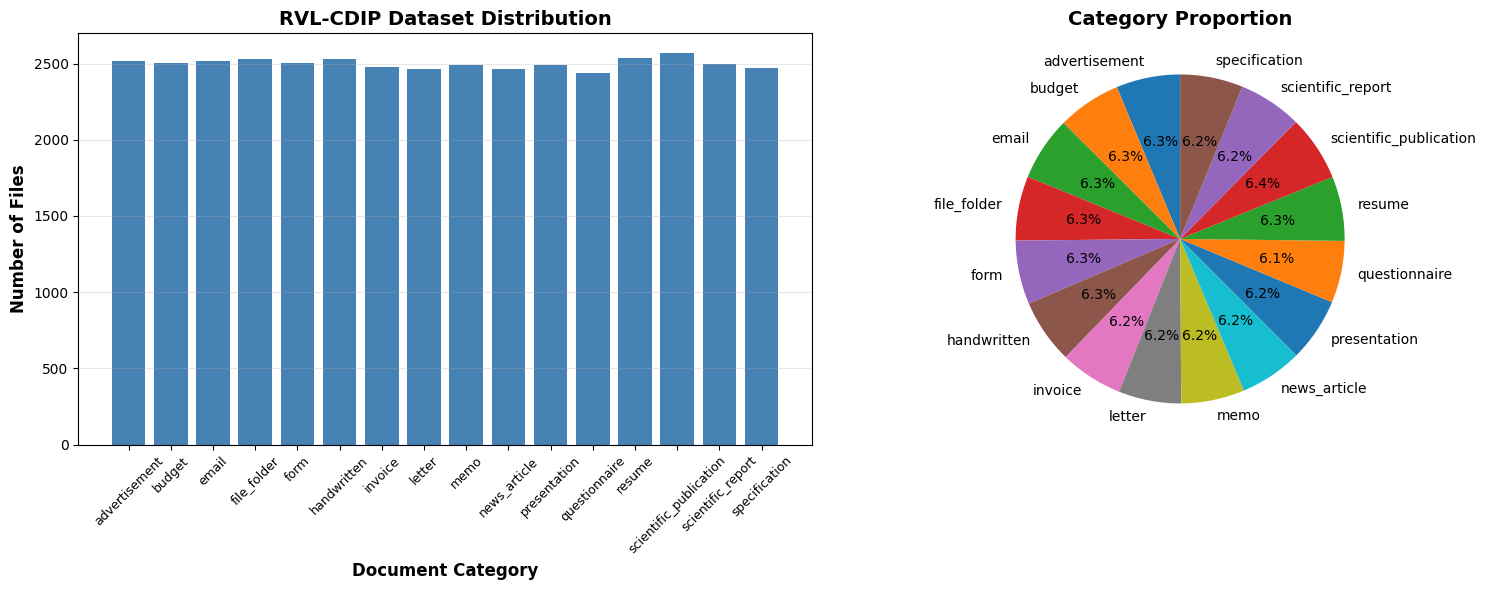

✓ Visualization saved to: /content/drive/MyDrive/passionproject/outputs/visualizations/dataset_distribution.png


In [ ]:
# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
axes[0].bar(df_stats['category'], df_stats['total_files'], color='steelblue')
axes[0].set_xlabel('Document Category', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Files', fontsize=12, fontweight='bold')
axes[0].set_title('RVL-CDIP Dataset Distribution', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45, labelsize=9)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(df_stats['total_files'], labels=df_stats['category'],
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Category Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
viz_path = os.path.join(OUTPUT_DIRS['visualizations'], 'dataset_distribution.png')
plt.savefig(viz_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Visualization saved to: {viz_path}")

**Advanced Preprocessing - Image Quality Enhancement**

In [ ]:
class DocumentPreprocessor:
    """Advanced preprocessing for document images"""

    def __init__(self):
        self.methods = []

    def load_image(self, image_path):
        """Load image from path"""
        return cv2.imread(image_path)

    def denoise(self, image):
        """Remove noise from image"""
        return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

    def binarize(self, image):
        """Convert to binary (black and white)"""
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return binary

    def deskew(self, image):
        """Correct image skew"""
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray = cv2.bitwise_not(gray)
        coords = np.column_stack(np.where(gray > 0))
        angle = cv2.minAreaRect(coords)[-1]

        if angle < -45:
            angle = -(90 + angle)
        else:
            angle = -angle

        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(image, M, (w, h),
                                  flags=cv2.INTER_CUBIC,
                                  borderMode=cv2.BORDER_REPLICATE)
        return rotated

    def enhance_contrast(self, image):
        """Enhance image contrast"""
        lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
        cl = clahe.apply(l)
        enhanced = cv2.merge((cl, a, b))
        return cv2.cvtColor(enhanced, cv2.COLOR_LAB2BGR)

    def preprocess(self, image_path, save_path=None):
        """Complete preprocessing pipeline"""
        # Load image
        img = self.load_image(image_path)

        if img is None:
            return None

        # Apply preprocessing steps
        img = self.denoise(img)
        img = self.deskew(img)
        img = self.enhance_contrast(img)

        # Save if path provided
        if save_path:
            cv2.imwrite(save_path, img)

        return img

# Initialize preprocessor
preprocessor = DocumentPreprocessor()
print("✓ DocumentPreprocessor initialized successfully!")

✓ DocumentPreprocessor initialized successfully!


**Test Preprocessing on Sample Images**

Testing preprocessing pipeline...



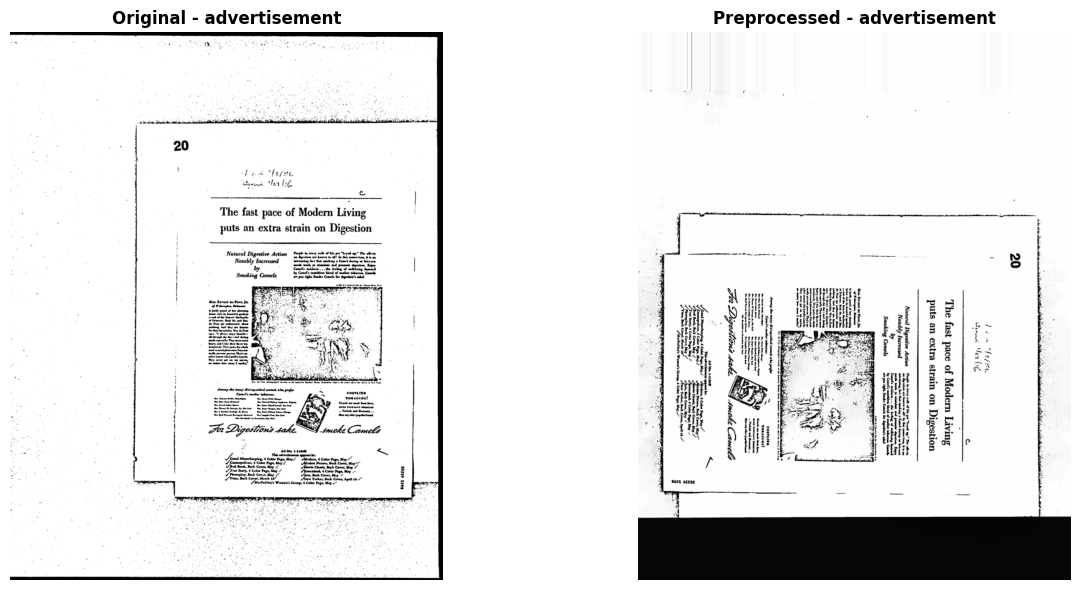

✓ Processed: advertisement/502595398.tif


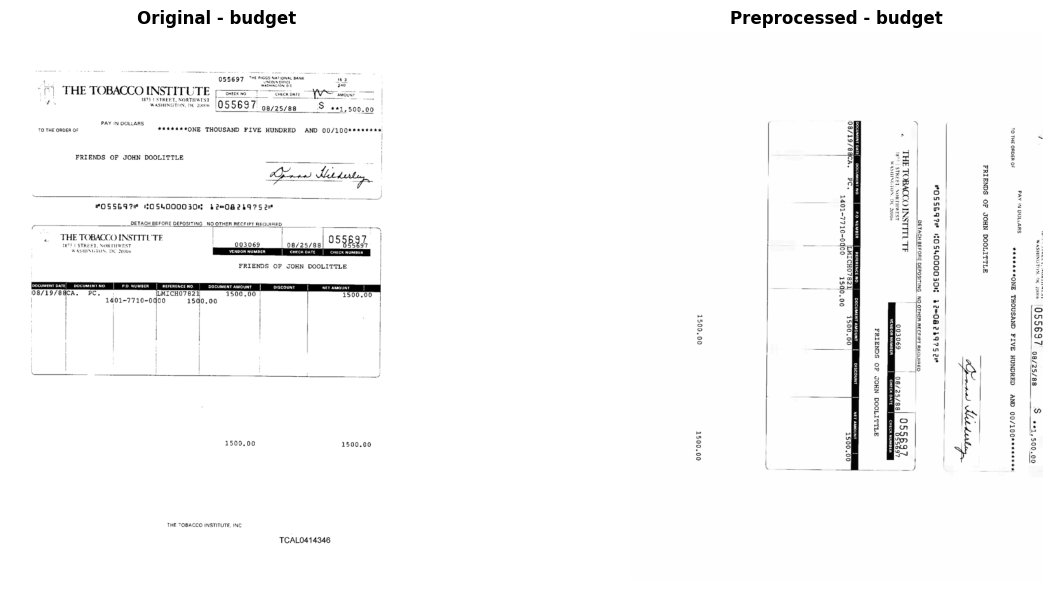

✓ Processed: budget/tcal0414346.tif


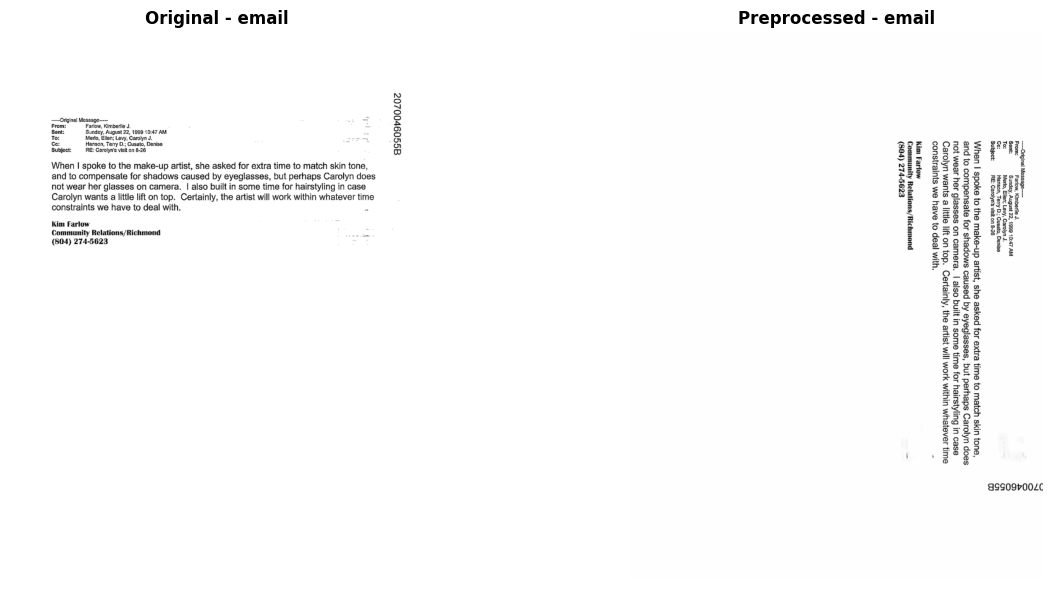

✓ Processed: email/2070046055b.tif


In [ ]:

def test_preprocessing(base_path, categories, num_samples=3):
    """Test preprocessing on sample images from each category"""

    print("Testing preprocessing pipeline...\n")

    for i, category in enumerate(categories[:3]):  # Test on first 3 categories
        category_path = os.path.join(base_path, category)

        if not os.path.exists(category_path):
            continue

        files = [f for f in os.listdir(category_path) if f.endswith('.tif')]

        if not files:
            continue

        # Select random sample
        sample_file = random.choice(files)
        input_path = os.path.join(category_path, sample_file)

        # Process image
        try:
            original = cv2.imread(input_path)
            processed = preprocessor.preprocess(input_path)

            # Display comparison
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
            axes[0].set_title(f'Original - {category}', fontsize=12, fontweight='bold')
            axes[0].axis('off')

            axes[1].imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
            axes[1].set_title(f'Preprocessed - {category}', fontsize=12, fontweight='bold')
            axes[1].axis('off')

            plt.tight_layout()
            save_path = os.path.join(OUTPUT_DIRS['visualizations'],
                                     f'preprocessing_test_{category}.png')
            plt.savefig(save_path, dpi=200, bbox_inches='tight')
            plt.show()

            print(f"✓ Processed: {category}/{sample_file}")

        except Exception as e:
            print(f"❌ Error processing {category}/{sample_file}: {str(e)}")

# Run preprocessing test
test_preprocessing(BASE_PATH, CATEGORIES)

**OCR with Tesseract**

In [ ]:
# Install Tesseract
!apt-get install -q tesseract-ocr
!apt-get install -q libtesseract-dev

import pytesseract
from pytesseract import Output

class TesseractOCR:
    """OCR using Tesseract (free alternative to Google Vision API)"""

    def __init__(self):
        self.config = '--oem 3 --psm 6'

    def extract_text(self, image_path):
        """Extract text from image"""
        img = Image.open(image_path)
        text = pytesseract.image_to_string(img, config=self.config)
        return text

    def extract_text_with_coordinates(self, image_path):
        """Extract text with bounding box coordinates"""
        img = Image.open(image_path)
        data = pytesseract.image_to_data(img, output_type=Output.DICT, config=self.config)

        results = {
            'text': [],
            'coordinates': [],
            'confidence': []
        }

        n_boxes = len(data['text'])
        for i in range(n_boxes):
            if int(data['conf'][i]) > 0:  # Filter out low confidence
                text = data['text'][i].strip()
                if text:
                    x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
                    results['text'].append(text)
                    results['coordinates'].append({
                        'x': x, 'y': y, 'width': w, 'height': h,
                        'x2': x + w, 'y2': y + h
                    })
                    results['confidence'].append(data['conf'][i])

        return results

# Initialize Tesseract OCR
ocr_engine = TesseractOCR()
print("✓ Tesseract OCR initialized successfully!")

Reading package lists...
Building dependency tree...
Reading state information...
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
Reading package lists...
Building dependency tree...
Reading state information...
libtesseract-dev is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
✓ Tesseract OCR initialized successfully!


**Test OCR on Sample Documents**

In [ ]:
def test_ocr(base_path, categories, num_samples=2):
    """Test OCR on sample documents"""

    print("Testing OCR pipeline...\n")

    for category in categories[:2]:  # Test on first 2 categories
        category_path = os.path.join(base_path, category)

        if not os.path.exists(category_path):
            continue

        files = [f for f in os.listdir(category_path) if f.endswith('.tif')]

        if not files:
            continue

        # Select random sample
        sample_file = random.choice(files)
        input_path = os.path.join(category_path, sample_file)

        print(f"\n{'='*70}")
        print(f"Processing: {category}/{sample_file}")
        print(f"{'='*70}")

        try:
            # Preprocess image
            processed_path = os.path.join(OUTPUT_DIRS['processed_images'],
                                         f"{category}_{sample_file}")
            preprocessor.preprocess(input_path, processed_path)

            # Extract text with coordinates
            ocr_results = ocr_engine.extract_text_with_coordinates(processed_path)

            print(f"\nExtracted {len(ocr_results['text'])} text elements")
            print(f"Sample extracted text (first 5 elements):")
            for i, text in enumerate(ocr_results['text'][:5]):
                coords = ocr_results['coordinates'][i]
                conf = ocr_results['confidence'][i]
                print(f"  {i+1}. '{text}' at ({coords['x']}, {coords['y']}) - Confidence: {conf}%")

            # Save OCR results
            ocr_output = {
                'filename': sample_file,
                'category': category,
                'timestamp': datetime.now().isoformat(),
                'total_elements': len(ocr_results['text']),
                'results': ocr_results
            }

            output_file = os.path.join(OUTPUT_DIRS['ocr_results'],
                                      f"{category}_{sample_file.replace('.tif', '.json')}")
            with open(output_file, 'w') as f:
                json.dump(ocr_output, f, indent=2)

            print(f"✓ OCR results saved to: {output_file}")

        except Exception as e:
            print(f"❌ Error: {str(e)}")

# Run OCR test
test_ocr(BASE_PATH, CATEGORIES)

Testing OCR pipeline...


Processing: advertisement/502594130.tif

Extracted 75 text elements
Sample extracted text (first 5 elements):
  1. 'a:' at (52, 140) - Confidence: 2%
  2. 'se' at (88, 141) - Confidence: 15%
  3. ':' at (439, 179) - Confidence: 15%
  4. ':' at (509, 179) - Confidence: 34%
  5. 'a' at (626, 367) - Confidence: 54%
✓ OCR results saved to: /content/drive/MyDrive/passionproject/outputs/ocr_results/advertisement_502594130.json

Processing: budget/2040740377_2040740392.tif

Extracted 29 text elements
Sample extracted text (first 5 elements):
  1. 'e' at (12, 110) - Confidence: 22%
  2. 'e' at (402, 107) - Confidence: 52%
  3. '@' at (790, 105) - Confidence: 17%
  4. '0.' at (0, 154) - Confidence: 70%
  5. 'DATE' at (96, 145) - Confidence: 96%
✓ OCR results saved to: /content/drive/MyDrive/passionproject/outputs/ocr_results/budget_2040740377_2040740392.json


**Batch Processing Pipeline**

In [ ]:
class DocumentProcessor:
    """Complete document processing pipeline"""

    def __init__(self, preprocessor, ocr_engine, output_dirs):
        self.preprocessor = preprocessor
        self.ocr_engine = ocr_engine
        self.output_dirs = output_dirs
        self.processing_log = []

    def process_document(self, image_path, category):
        """Process a single document"""
        filename = os.path.basename(image_path)

        try:
            # Step 1: Preprocess
            processed_path = os.path.join(
                self.output_dirs['processed_images'],
                f"{category}_{filename}"
            )
            self.preprocessor.preprocess(image_path, processed_path)

            # Step 2: OCR with spatial data
            ocr_results = self.ocr_engine.extract_text_with_coordinates(processed_path)

            # Step 3: Create structured output
            document_data = {
                'filename': filename,
                'category': category,
                'timestamp': datetime.now().isoformat(),
                'preprocessing': {
                    'completed': True,
                    'output_path': processed_path
                },
                'ocr': {
                    'total_elements': len(ocr_results['text']),
                    'text_elements': ocr_results['text'],
                    'spatial_coordinates': ocr_results['coordinates'],
                    'confidence_scores': ocr_results['confidence']
                },
                'full_text': ' '.join(ocr_results['text'])
            }

            # Save results
            output_file = os.path.join(
                self.output_dirs['json_outputs'],
                f"{category}_{filename.replace('.tif', '.json')}"
            )

            with open(output_file, 'w') as f:
                json.dump(document_data, f, indent=2)

            self.processing_log.append({
                'filename': filename,
                'category': category,
                'status': 'success',
                'output_file': output_file
            })

            return document_data

        except Exception as e:
            self.processing_log.append({
                'filename': filename,
                'category': category,
                'status': 'failed',
                'error': str(e)
            })
            return None

    def process_category(self, base_path, category, max_files=None):
        """Process all documents in a category"""
        category_path = os.path.join(base_path, category)

        if not os.path.exists(category_path):
            print(f"❌ Category path not found: {category_path}")
            return []

        files = [f for f in os.listdir(category_path) if f.endswith('.tif')]

        if max_files:
            files = files[:max_files]

        print(f"\nProcessing {len(files)} files from category: {category}")

        results = []
        for file in tqdm(files, desc=f"Processing {category}"):
            file_path = os.path.join(category_path, file)
            result = self.process_document(file_path, category)
            if result:
                results.append(result)

        return results

    def save_processing_log(self):
        """Save processing log"""
        log_file = os.path.join(
            self.output_dirs['logs'],
            f"processing_log_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"
        )

        with open(log_file, 'w') as f:
            json.dump(self.processing_log, f, indent=2)

        print(f"\n✓ Processing log saved to: {log_file}")
        return log_file

# Initialize document processor
doc_processor = DocumentProcessor(preprocessor, ocr_engine, OUTPUT_DIRS)
print("✓ DocumentProcessor initialized successfully!")

✓ DocumentProcessor initialized successfully!


**Process Sample Dataset (Limited Batch)**

In [ ]:
print("="*70)
print("PROCESSING SAMPLE DATASET")
print("="*70)
print("\nProcessing 5 files from each category for Week 1 milestone...\n")

# Process limited sample from each category
all_results = []
MAX_FILES_PER_CATEGORY = 5  # Adjust this number based on your needs

for category in CATEGORIES:
    results = doc_processor.process_category(BASE_PATH, category, max_files=MAX_FILES_PER_CATEGORY)
    all_results.extend(results)

# Save processing log
log_file = doc_processor.save_processing_log()

print(f"\n{'='*70}")
print(f"PROCESSING COMPLETE")
print(f"{'='*70}")
print(f"Total documents processed: {len(all_results)}")
print(f"Total categories: {len(CATEGORIES)}")
print(f"Processing log: {log_file}")


PROCESSING SAMPLE DATASET

Processing 5 files from each category for Week 1 milestone...


Processing 5 files from category: advertisement


Processing advertisement: 100%|██████████| 5/5 [00:25<00:00,  5.08s/it]



Processing 5 files from category: budget


Processing budget: 100%|██████████| 5/5 [00:24<00:00,  4.83s/it]



Processing 5 files from category: email


Processing email: 100%|██████████| 5/5 [00:21<00:00,  4.37s/it]



Processing 5 files from category: file_folder


Processing file_folder: 100%|██████████| 5/5 [00:17<00:00,  3.51s/it]



Processing 5 files from category: form


Processing form: 100%|██████████| 5/5 [00:31<00:00,  6.24s/it]



Processing 5 files from category: handwritten


Processing handwritten: 100%|██████████| 5/5 [00:22<00:00,  4.48s/it]



Processing 5 files from category: invoice


Processing invoice: 100%|██████████| 5/5 [00:28<00:00,  5.77s/it]



Processing 5 files from category: letter


Processing letter: 100%|██████████| 5/5 [00:47<00:00,  9.52s/it]



Processing 5 files from category: memo


Processing memo: 100%|██████████| 5/5 [00:33<00:00,  6.64s/it]



Processing 5 files from category: news_article


Processing news_article: 100%|██████████| 5/5 [00:32<00:00,  6.52s/it]



Processing 5 files from category: presentation


Processing presentation: 100%|██████████| 5/5 [00:25<00:00,  5.11s/it]



Processing 5 files from category: questionnaire


Processing questionnaire: 100%|██████████| 5/5 [00:34<00:00,  6.90s/it]



Processing 5 files from category: resume


Processing resume: 100%|██████████| 5/5 [00:45<00:00,  9.15s/it]



Processing 5 files from category: scientific_publication


Processing scientific_publication: 100%|██████████| 5/5 [00:46<00:00,  9.20s/it]



Processing 5 files from category: scientific_report


Processing scientific_report: 100%|██████████| 5/5 [00:23<00:00,  4.68s/it]



Processing 5 files from category: specification


Processing specification: 100%|██████████| 5/5 [00:23<00:00,  4.76s/it]


✓ Processing log saved to: /content/drive/MyDrive/passionproject/outputs/logs/processing_log_20251015_085715.json

PROCESSING COMPLETE
Total documents processed: 80
Total categories: 16
Processing log: /content/drive/MyDrive/passionproject/outputs/logs/processing_log_20251015_085715.json


**Generate Processing Report**


PROCESSING REPORT

Total Files Processed: 80
Successful: 80
Failed: 0
Success Rate: 100.00%

----------------------------------------------------------------------
Category-wise Statistics:
----------------------------------------------------------------------
status                  success
category                       
advertisement                 5
budget                        5
email                         5
file_folder                   5
form                          5
handwritten                   5
invoice                       5
letter                        5
memo                          5
news_article                  5
presentation                  5
questionnaire                 5
resume                        5
scientific_publication        5
scientific_report             5
specification                 5


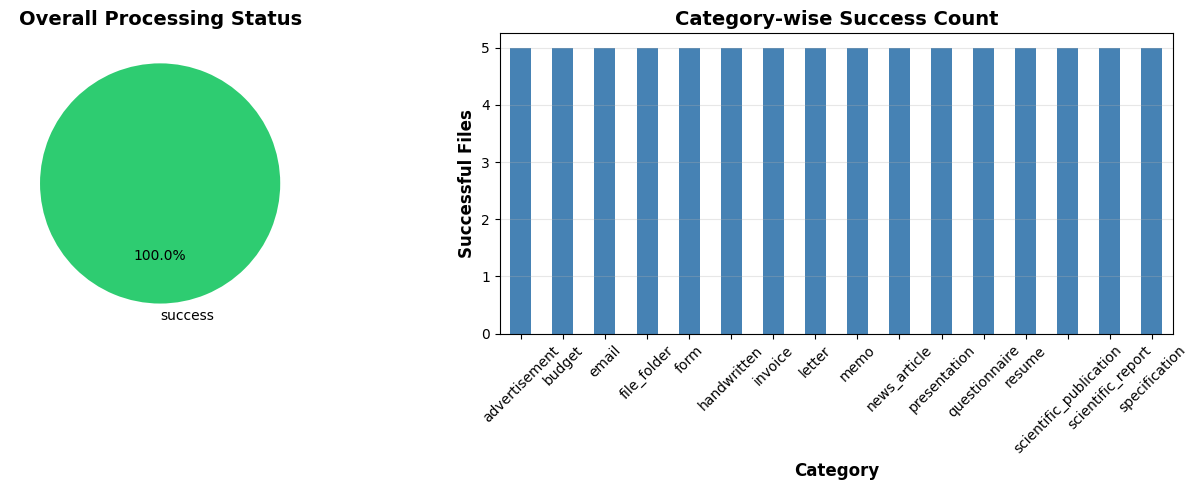


✓ Report saved to: /content/drive/MyDrive/passionproject/outputs/metadata/processing_report.json
✓ Visualization saved to: /content/drive/MyDrive/passionproject/outputs/metadata/processing_report.png


In [ ]:
def generate_processing_report(processing_log, output_dir):
    """Generate comprehensive processing report"""

    # Convert log to DataFrame
    df_log = pd.DataFrame(processing_log)

    # Calculate statistics
    total_files = len(df_log)
    successful = len(df_log[df_log['status'] == 'success'])
    failed = len(df_log[df_log['status'] == 'failed'])
    success_rate = (successful / total_files * 100) if total_files > 0 else 0

    # Category-wise statistics
    category_stats = df_log.groupby('category')['status'].value_counts().unstack(fill_value=0)

    # Create report
    report = {
        'summary': {
            'total_files': total_files,
            'successful': successful,
            'failed': failed,
            'success_rate': f"{success_rate:.2f}%",
            'timestamp': datetime.now().isoformat()
        },
        'category_statistics': category_stats.to_dict()
    }

    # Print report
    print("\n" + "="*70)
    print("PROCESSING REPORT")
    print("="*70)
    print(f"\nTotal Files Processed: {total_files}")
    print(f"Successful: {successful}")
    print(f"Failed: {failed}")
    print(f"Success Rate: {success_rate:.2f}%")

    print("\n" + "-"*70)
    print("Category-wise Statistics:")
    print("-"*70)
    print(category_stats)

    # Visualize results
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Pie chart for overall status
    status_counts = df_log['status'].value_counts()
    axes[0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
                colors=['#2ecc71', '#e74c3c'], startangle=90)
    axes[0].set_title('Overall Processing Status', fontsize=14, fontweight='bold')

    # Bar chart for category-wise success
    if 'success' in category_stats.columns:
        category_stats['success'].plot(kind='bar', ax=axes[1], color='steelblue')
        axes[1].set_xlabel('Category', fontsize=12, fontweight='bold')
        axes[1].set_ylabel('Successful Files', fontsize=12, fontweight='bold')
        axes[1].set_title('Category-wise Success Count', fontsize=14, fontweight='bold')
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    report_viz = os.path.join(output_dir, 'processing_report.png')
    plt.savefig(report_viz, dpi=300, bbox_inches='tight')
    plt.show()

    # Save report
    report_file = os.path.join(output_dir, 'processing_report.json')
    with open(report_file, 'w') as f:
        json.dump(report, f, indent=2)

    print(f"\n✓ Report saved to: {report_file}")
    print(f"✓ Visualization saved to: {report_viz}")

    return report

# Generate report
report = generate_processing_report(doc_processor.processing_log, OUTPUT_DIRS['metadata'])

In [ ]:
# Summary
print("\n" + "="*70)
print("WEEK 1 MILESTONE COMPLETION SUMMARY")
print("="*70)

print("""
✓ COMPLETED TASKS:
-------------------
1. ✓ Google Drive mounted and dataset verified
2. ✓ Output directory structure created
3. ✓ Dataset statistics generated and visualized
4. ✓ Advanced preprocessing pipeline implemented
5. ✓ OCR pipeline with spatial data extraction implemented
6. ✓ Batch processing pipeline created
7. ✓ Sample documents processed (5 per category)
8. ✓ Structured JSON outputs generated
9. ✓ Processing reports and visualizations created

📊 OUTPUT FILES GENERATED:
-------------------------
""")

# List all output directories and their contents
for dir_name, dir_path in OUTPUT_DIRS.items():
    file_count = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))])
    print(f"  • {dir_name:20s}: {file_count:4d} files")

print(f"""
📁 All outputs saved to: {OUTPUT_BASE}

""")



WEEK 1 MILESTONE COMPLETION SUMMARY

✓ COMPLETED TASKS:
-------------------
1. ✓ Google Drive mounted and dataset verified
2. ✓ Output directory structure created
3. ✓ Dataset statistics generated and visualized
4. ✓ Advanced preprocessing pipeline implemented
5. ✓ OCR pipeline with spatial data extraction implemented
6. ✓ Batch processing pipeline created
7. ✓ Sample documents processed (5 per category)
8. ✓ Structured JSON outputs generated
9. ✓ Processing reports and visualizations created

📊 OUTPUT FILES GENERATED:
-------------------------

  • processed_images    :   82 files
  • ocr_results         :    2 files
  • spatial_data        :    0 files
  • classifications     :    0 files
  • metadata            :    3 files
  • json_outputs        :   80 files
  • logs                :    1 files
  • visualizations      :    4 files

📁 All outputs saved to: /content/drive/MyDrive/passionproject/outputs




**Spatial Feature Analysis and Visualization**

Analyzing spatial features from processed documents...



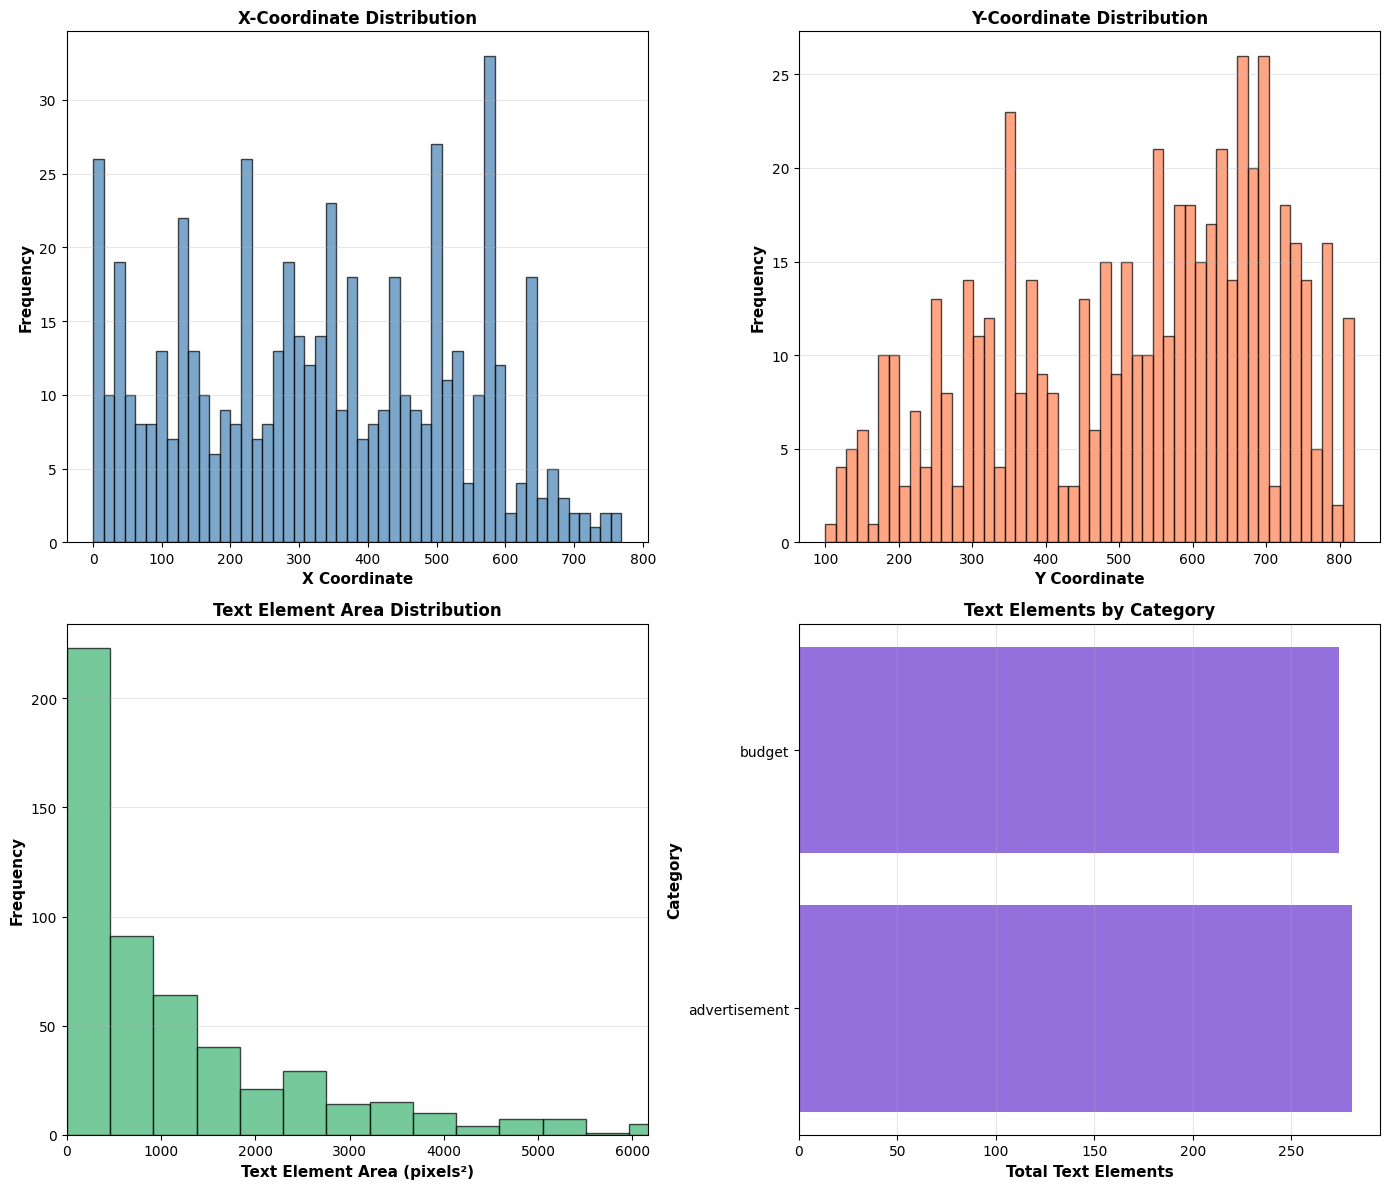

✓ Spatial feature analysis complete!
✓ Visualization saved to: /content/drive/MyDrive/passionproject/outputs/visualizations/spatial_feature_analysis.png
✓ Spatial data saved to: /content/drive/MyDrive/passionproject/outputs/spatial_data/spatial_statistics.csv


In [ ]:
def analyze_spatial_features(json_outputs_dir, max_samples=10):
    """Analyze spatial distribution of text elements"""

    print("Analyzing spatial features from processed documents...\n")

    json_files = [f for f in os.listdir(json_outputs_dir) if f.endswith('.json')][:max_samples]

    spatial_stats = []

    for json_file in json_files:
        file_path = os.path.join(json_outputs_dir, json_file)

        with open(file_path, 'r') as f:
            data = json.load(f)

        if 'ocr' in data and 'spatial_coordinates' in data['ocr']:
            coords = data['ocr']['spatial_coordinates']

            for coord in coords:
                spatial_stats.append({
                    'category': data['category'],
                    'x': coord['x'],
                    'y': coord['y'],
                    'width': coord['width'],
                    'height': coord['height'],
                    'area': coord['width'] * coord['height']
                })

    if spatial_stats:
        df_spatial = pd.DataFrame(spatial_stats)

        # Visualize spatial distribution
        fig, axes = plt.subplots(2, 2, figsize=(14, 12))

        # X-coordinate distribution
        axes[0, 0].hist(df_spatial['x'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
        axes[0, 0].set_xlabel('X Coordinate', fontsize=11, fontweight='bold')
        axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
        axes[0, 0].set_title('X-Coordinate Distribution', fontsize=12, fontweight='bold')
        axes[0, 0].grid(axis='y', alpha=0.3)

        # Y-coordinate distribution
        axes[0, 1].hist(df_spatial['y'], bins=50, color='coral', alpha=0.7, edgecolor='black')
        axes[0, 1].set_xlabel('Y Coordinate', fontsize=11, fontweight='bold')
        axes[0, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
        axes[0, 1].set_title('Y-Coordinate Distribution', fontsize=12, fontweight='bold')
        axes[0, 1].grid(axis='y', alpha=0.3)

        # Text element area distribution
        axes[1, 0].hist(df_spatial['area'], bins=50, color='mediumseagreen', alpha=0.7, edgecolor='black')
        axes[1, 0].set_xlabel('Text Element Area (pixels²)', fontsize=11, fontweight='bold')
        axes[1, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
        axes[1, 0].set_title('Text Element Area Distribution', fontsize=12, fontweight='bold')
        axes[1, 0].set_xlim(0, df_spatial['area'].quantile(0.95))  # Remove outliers for better viz
        axes[1, 0].grid(axis='y', alpha=0.3)

        # Category-wise average text element count
        category_counts = df_spatial.groupby('category').size()
        axes[1, 1].barh(category_counts.index, category_counts.values, color='mediumpurple')
        axes[1, 1].set_xlabel('Total Text Elements', fontsize=11, fontweight='bold')
        axes[1, 1].set_ylabel('Category', fontsize=11, fontweight='bold')
        axes[1, 1].set_title('Text Elements by Category', fontsize=12, fontweight='bold')
        axes[1, 1].grid(axis='x', alpha=0.3)

        plt.tight_layout()
        spatial_viz = os.path.join(OUTPUT_DIRS['visualizations'], 'spatial_feature_analysis.png')
        plt.savefig(spatial_viz, dpi=300, bbox_inches='tight')
        plt.show()

        print(f"✓ Spatial feature analysis complete!")
        print(f"✓ Visualization saved to: {spatial_viz}")

        # Save spatial statistics
        spatial_csv = os.path.join(OUTPUT_DIRS['spatial_data'], 'spatial_statistics.csv')
        df_spatial.to_csv(spatial_csv, index=False)
        print(f"✓ Spatial data saved to: {spatial_csv}")

        return df_spatial
    else:
        print("❌ No spatial data found in processed documents")
        return None

# Run spatial analysis
df_spatial = analyze_spatial_features(OUTPUT_DIRS['json_outputs'])

**Text Statistics and Quality Metrics**

Analyzing text quality metrics...



Analyzing text quality: 100%|██████████| 80/80 [00:00<00:00, 279.51it/s]



TEXT QUALITY SUMMARY

Total Documents Analyzed: 80
Documents with Extracted Text: 79
Empty Documents: 1

Average Word Count: 103.50
Average Character Count: 351.02
Average Confidence Score: 40.95%

----------------------------------------------------------------------
Category-wise Statistics:
----------------------------------------------------------------------
                        word_count  avg_confidence  text_elements
category                                                         
advertisement                 56.2           42.15           56.2
budget                        54.8           56.02           54.8
email                         58.0           47.55           58.0
file_folder                    5.8           30.54            5.8
form                         123.2           38.43          123.2
handwritten                   54.6           38.44           54.6
invoice                      154.6           41.77          154.6
letter                       192.4     

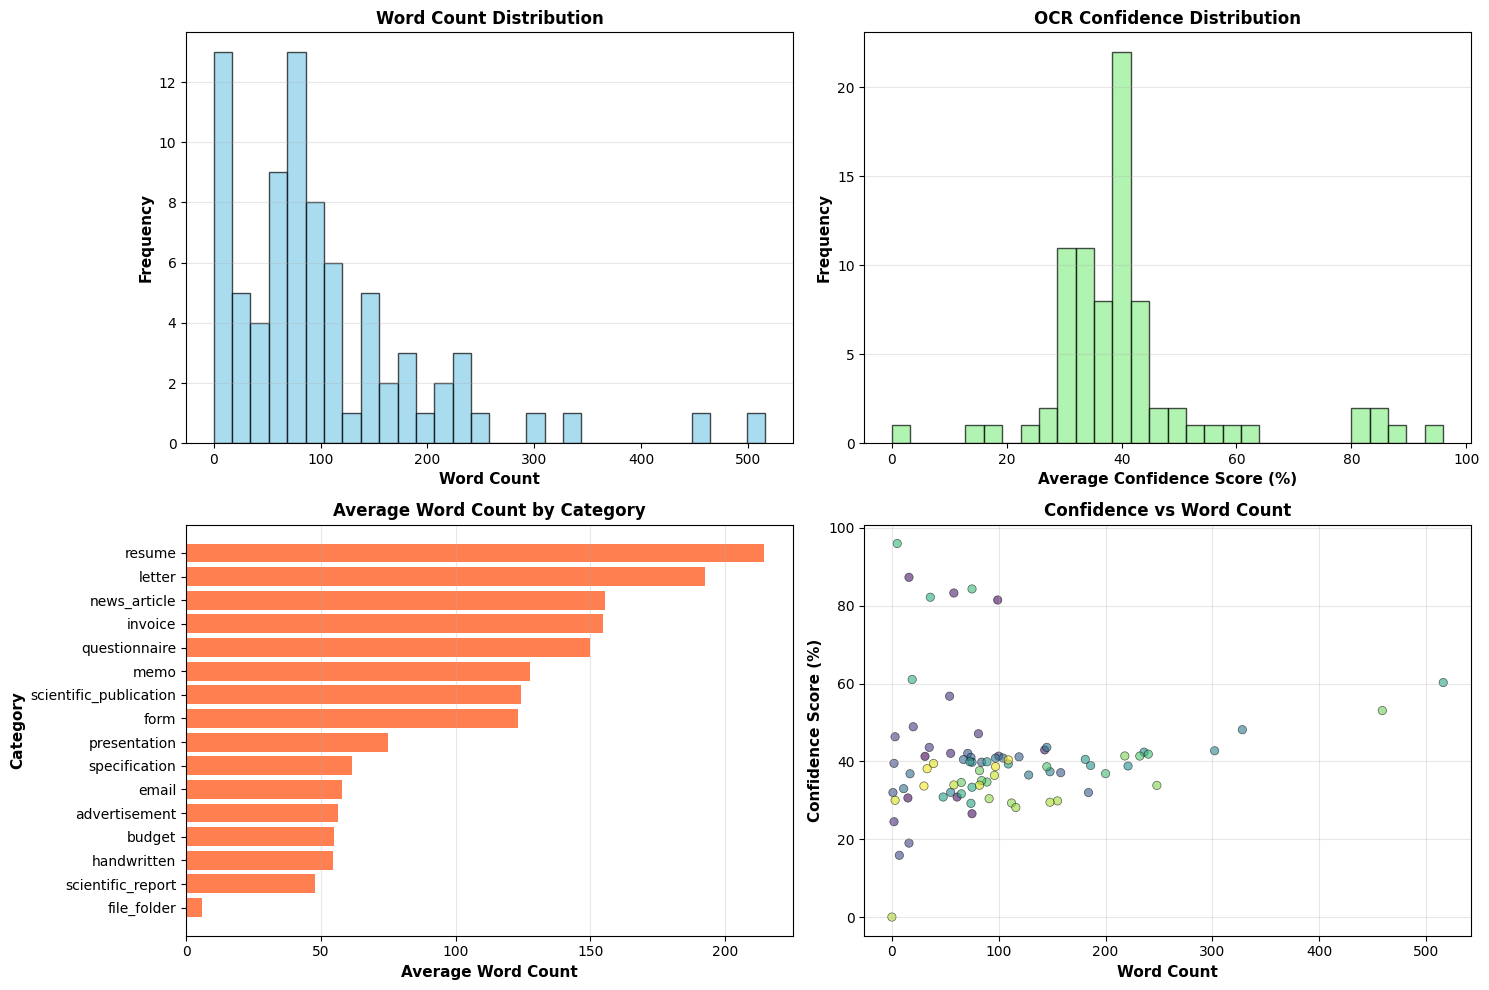


✓ Text quality analysis complete!
✓ Visualization saved to: /content/drive/MyDrive/passionproject/outputs/visualizations/text_quality_analysis.png
✓ Quality metrics saved to: /content/drive/MyDrive/passionproject/outputs/metadata/text_quality_metrics.csv


In [ ]:

def analyze_text_quality(json_outputs_dir):
    """Analyze text extraction quality and statistics"""

    print("Analyzing text quality metrics...\n")

    json_files = [f for f in os.listdir(json_outputs_dir) if f.endswith('.json')]

    quality_metrics = []

    for json_file in tqdm(json_files, desc="Analyzing text quality"):
        file_path = os.path.join(json_outputs_dir, json_file)

        with open(file_path, 'r') as f:
            data = json.load(f)

        full_text = data.get('full_text', '')
        ocr_data = data.get('ocr', {})

        # Calculate metrics
        word_count = len(full_text.split())
        char_count = len(full_text)
        avg_confidence = np.mean(ocr_data.get('confidence_scores', [0])) if ocr_data.get('confidence_scores') else 0

        quality_metrics.append({
            'filename': data['filename'],
            'category': data['category'],
            'word_count': word_count,
            'character_count': char_count,
            'text_elements': ocr_data.get('total_elements', 0),
            'avg_confidence': round(avg_confidence, 2),
            'has_text': word_count > 0
        })

    df_quality = pd.DataFrame(quality_metrics)

    # Display summary statistics
    print("\n" + "="*70)
    print("TEXT QUALITY SUMMARY")
    print("="*70)
    print(f"\nTotal Documents Analyzed: {len(df_quality)}")
    print(f"Documents with Extracted Text: {df_quality['has_text'].sum()}")
    print(f"Empty Documents: {(~df_quality['has_text']).sum()}")
    print(f"\nAverage Word Count: {df_quality['word_count'].mean():.2f}")
    print(f"Average Character Count: {df_quality['character_count'].mean():.2f}")
    print(f"Average Confidence Score: {df_quality['avg_confidence'].mean():.2f}%")

    print("\n" + "-"*70)
    print("Category-wise Statistics:")
    print("-"*70)
    category_stats = df_quality.groupby('category').agg({
        'word_count': 'mean',
        'avg_confidence': 'mean',
        'text_elements': 'mean'
    }).round(2)
    print(category_stats)

    # Visualize quality metrics
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Word count distribution
    axes[0, 0].hist(df_quality['word_count'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].set_xlabel('Word Count', fontsize=11, fontweight='bold')
    axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axes[0, 0].set_title('Word Count Distribution', fontsize=12, fontweight='bold')
    axes[0, 0].grid(axis='y', alpha=0.3)

    # Confidence score distribution
    axes[0, 1].hist(df_quality['avg_confidence'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[0, 1].set_xlabel('Average Confidence Score (%)', fontsize=11, fontweight='bold')
    axes[0, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axes[0, 1].set_title('OCR Confidence Distribution', fontsize=12, fontweight='bold')
    axes[0, 1].grid(axis='y', alpha=0.3)

    # Category-wise average word count
    category_word_counts = df_quality.groupby('category')['word_count'].mean().sort_values()
    axes[1, 0].barh(category_word_counts.index, category_word_counts.values, color='coral')
    axes[1, 0].set_xlabel('Average Word Count', fontsize=11, fontweight='bold')
    axes[1, 0].set_ylabel('Category', fontsize=11, fontweight='bold')
    axes[1, 0].set_title('Average Word Count by Category', fontsize=12, fontweight='bold')
    axes[1, 0].grid(axis='x', alpha=0.3)

    # Confidence vs Word Count scatter
    axes[1, 1].scatter(df_quality['word_count'], df_quality['avg_confidence'],
                       alpha=0.6, c=df_quality.index, cmap='viridis', edgecolors='black', linewidth=0.5)
    axes[1, 1].set_xlabel('Word Count', fontsize=11, fontweight='bold')
    axes[1, 1].set_ylabel('Confidence Score (%)', fontsize=11, fontweight='bold')
    axes[1, 1].set_title('Confidence vs Word Count', fontsize=12, fontweight='bold')
    axes[1, 1].grid(alpha=0.3)

    plt.tight_layout()
    quality_viz = os.path.join(OUTPUT_DIRS['visualizations'], 'text_quality_analysis.png')
    plt.savefig(quality_viz, dpi=300, bbox_inches='tight')
    plt.show()

    # Save quality metrics
    quality_csv = os.path.join(OUTPUT_DIRS['metadata'], 'text_quality_metrics.csv')
    df_quality.to_csv(quality_csv, index=False)

    print(f"\n✓ Text quality analysis complete!")
    print(f"✓ Visualization saved to: {quality_viz}")
    print(f"✓ Quality metrics saved to: {quality_csv}")

    return df_quality

# Run text quality analysis
df_quality = analyze_text_quality(OUTPUT_DIRS['json_outputs'])

**Sample JSON Output Inspector**

In [ ]:
def inspect_sample_outputs(json_outputs_dir, num_samples=3):
    """Display sample JSON outputs for inspection"""

    print("="*70)
    print("SAMPLE JSON OUTPUT INSPECTION")
    print("="*70)

    json_files = [f for f in os.listdir(json_outputs_dir) if f.endswith('.json')][:num_samples]

    for i, json_file in enumerate(json_files, 1):
        file_path = os.path.join(json_outputs_dir, json_file)

        print(f"\n{'='*70}")
        print(f"Sample {i}: {json_file}")
        print(f"{'='*70}")

        with open(file_path, 'r') as f:
            data = json.load(f)

        # Display key information
        print(f"\n📄 Filename: {data['filename']}")
        print(f"📁 Category: {data['category']}")
        print(f"⏰ Timestamp: {data['timestamp']}")
        print(f"✅ Preprocessing: {data['preprocessing']['completed']}")
        print(f"📊 Total Text Elements: {data['ocr']['total_elements']}")

        # Display sample text elements
        if data['ocr']['text_elements']:
            print(f"\n📝 Sample Text Elements (first 10):")
            for j, text in enumerate(data['ocr']['text_elements'][:10], 1):
                coords = data['ocr']['spatial_coordinates'][j-1]
                conf = data['ocr']['confidence_scores'][j-1]
                print(f"  {j:2d}. '{text}' @ ({coords['x']}, {coords['y']}) - Conf: {conf}%")

        # Display first 200 characters of full text
        full_text = data.get('full_text', '')
        if full_text:
            print(f"\n📄 Full Text Preview (first 200 chars):")
            print(f"  {full_text[:200]}...")

        print(f"\n💾 Full JSON Path: {file_path}")

# Inspect sample outputs
inspect_sample_outputs(OUTPUT_DIRS['json_outputs'])

SAMPLE JSON OUTPUT INSPECTION

Sample 1: advertisement_502612982+-2982.json

📄 Filename: 502612982+-2982.tif
📁 Category: advertisement
⏰ Timestamp: 2025-10-15T08:49:14.932940
✅ Preprocessing: True
📊 Total Text Elements: 31

📝 Sample Text Elements (first 10):
   1. '|' @ (306, 127) - Conf: 82%
   2. 'i' @ (343, 145) - Conf: 61%
   3. 'you' @ (2, 382) - Conf: 47%
   4. 'tg' @ (230, 385) - Conf: 6%
   5. '3' @ (695, 399) - Conf: 82%
   6. 'ee' @ (0, 424) - Conf: 26%
   7. 'sé' @ (472, 439) - Conf: 31%
   8. '3B' @ (11, 479) - Conf: 17%
   9. 'g' @ (40, 483) - Conf: 40%
  10. 'FE' @ (58, 475) - Conf: 47%

📄 Full Text Preview (first 200 chars):
  | i you tg 3 ee sé 3B g FE ge° ge H nhs Soller — i "Pag —— a mee i IGARETTES — i ir Mae a ae: [SL ae...

💾 Full JSON Path: /content/drive/MyDrive/passionproject/outputs/json_outputs/advertisement_502612982+-2982.json

Sample 2: advertisement_502612277a-2278.json

📄 Filename: 502612277a-2278.tif
📁 Category: advertisement
⏰ Timestamp: 2025-10-15T08:4